In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!cp /content/drive/MyDrive/MMDS-Data/spark-3.1.1-bin-hadoop3.2.tgz .
!tar xf spark-3.1.1-bin-hadoop3.2.tgz
!pip install -q findspark

In [4]:
import matplotlib.pyplot as plt

In [6]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"

In [7]:
import findspark
findspark.init()

In [8]:
from pyspark.sql import SparkSession
spark = SparkSession.builder \
      .master("local[1]") \
      .appName("CustomerPersonalityAnalysis") \
      .getOrCreate()

In [9]:
from pyspark.sql.functions import col, isnan, when, count
from pyspark.sql import functions as F

# Explore the data

In [11]:
import pandas as pd
df = pd.read_csv("marketing_campaign.csv")

In [26]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

## Year of Birth

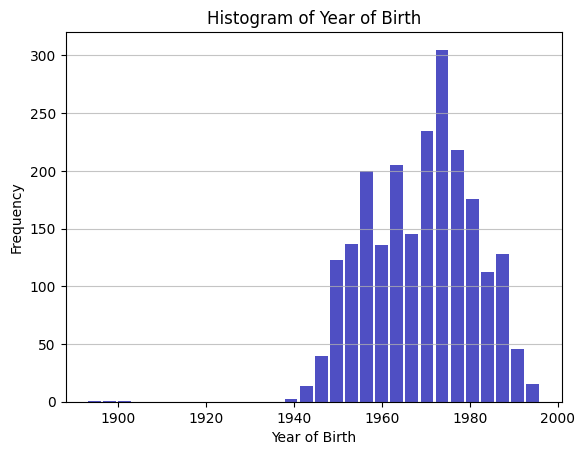

In [25]:
# Histogram about Year of Birth of customers
plt.hist(df["Year_Birth"], bins=30, color='#0504aa', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Year of Birth')
plt.ylabel('Frequency')
plt.title('Histogram of Year of Birth')
plt.show()

## Education

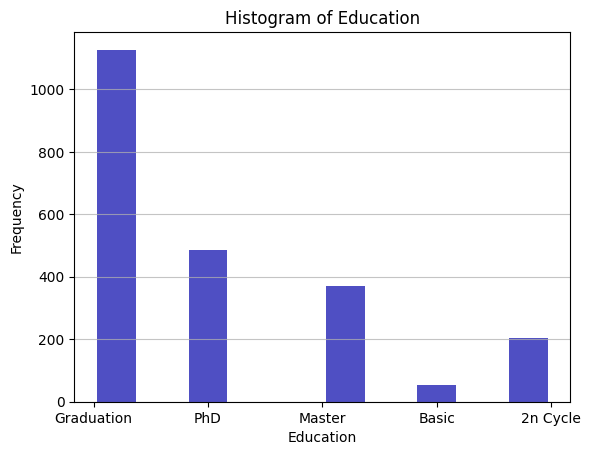

In [28]:
# Histogram about education of customers
plt.hist(df["Education"], color='#0504aa', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Education')
plt.ylabel('Frequency')
plt.title('Histogram of Education')
plt.show()

## Marital_Status

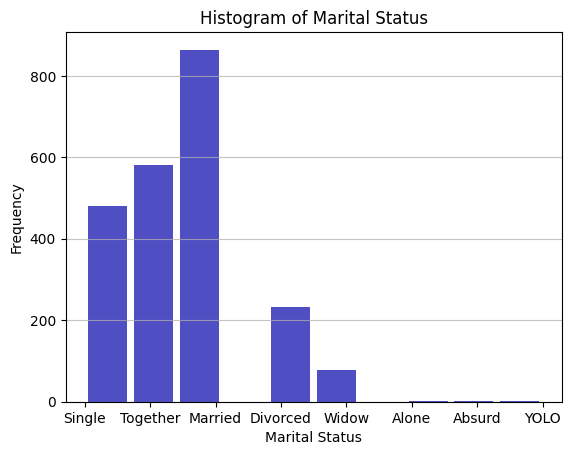

In [34]:
plt.hist(df["Marital_Status"], color='#0504aa', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel("Marital Status")
plt.ylabel("Frequency")
plt.title("Histogram of Marital Status")
plt.show()

## Income

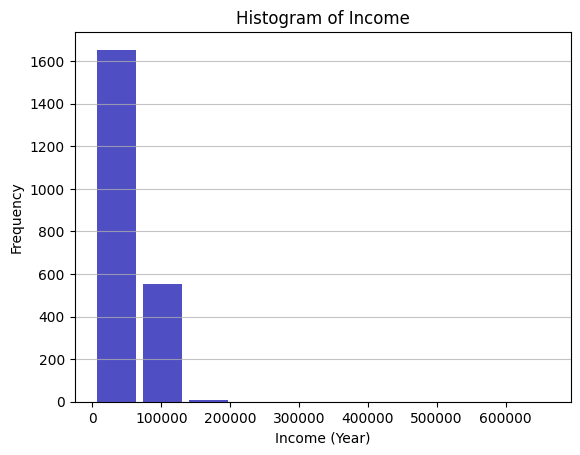

In [36]:
# Histogram illustrate income of customers
plt.hist(df["Income"], color='#0504aa', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Income (Year)')
plt.ylabel('Frequency')
plt.title('Histogram of Income')
plt.show()

## Kid Home

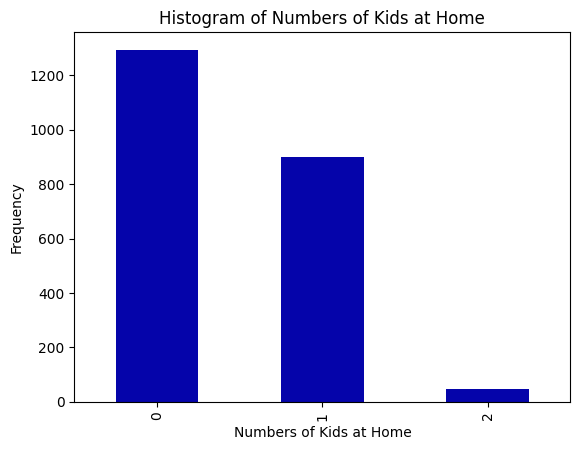

In [48]:
# Histogram illustrate numbers of kids at home of customers
df["Kidhome"].value_counts().plot(kind="bar", color='#0504aa')
plt.xlabel('Numbers of Kids at Home')
plt.ylabel('Frequency')
plt.title('Histogram of Numbers of Kids at Home')
plt.show()

In [10]:
file_path = "marketing_campaign.csv"

df = spark.read.csv(file_path, header=True, inferSchema=True)

In [ ]:
df.show(5)

## Teenhome

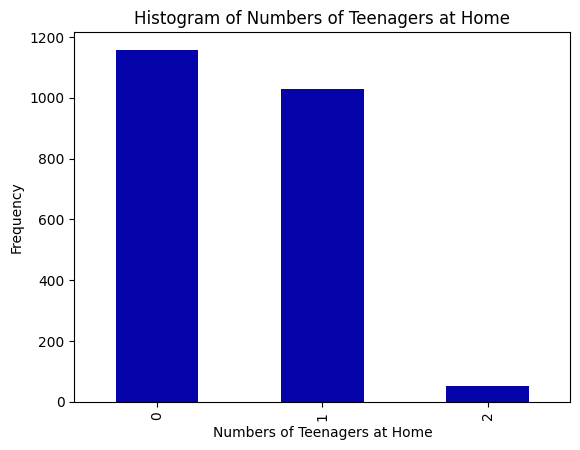

In [49]:
# Histogram illustrate numbers of teenagers at home of customers
df["Teenhome"].value_counts().plot(kind="bar", color='#0504aa')
plt.xlabel('Numbers of Teenagers at Home')
plt.ylabel('Frequency')
plt.title('Histogram of Numbers of Teenagers at Home')
plt.show()

## Dt_Customer

In [52]:
df["MntWines"]

,MntWines
0,635
1,11
2,426
3,11
4,173
...,...
2235,709
2236,406
2237,908
2238,428


# Preprocessing/ Cleaning Data

## Find null value in dataset

In [ ]:
null_count = df.select([
    count(when(col(c).contains('None') |\
               col(c).contains('NULL') |\
               (col(c) == '') |\
               col(c).isNull() |\
               isnan(c), c
               )).alias(c)
    for c in df.columns
])

null_count.show()

## Visualizing NULL values in DF

In [ ]:
plt.barh(null_count.columns, null_count.collect()[0])

## Drop null example in dataFrame

In [ ]:
df = df.na.drop()

In [ ]:
null_count = df.select([
    count(when(col(c).contains('None') |\
               col(c).contains('NULL') |\
               (col(c) == '') |\
               col(c).isNull() |\
               isnan(c), c
               )).alias(c)
    for c in df.columns
])

null_count.show()

## Visualizing NULL data after using df.na.drop() function

In [ ]:
plt.barh(null_count.columns, null_count.collect()[0])

## Processing Datatime format

In [ ]:
df = df.withColumn("Year_Birth", F.regexp_replace("Year_Birth", "/", "-"))

df = df.withColumn("Year_Birth", F.col("Year_Birth").cast("date"))